In [1]:
!pip install --upgrade numpy
!pip install --upgrade scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 42.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505209 sha256=

In [2]:
!pip uninstall -y numpy scikit-surprise
!pip install "numpy<2.0"
!pip install scikit-surprise

Found existing installation: numpy 2.2.5
Uninstalling numpy-2.2.5:
  Successfully uninstalled numpy-2.2.5
Found existing installation: scikit-surprise 1.1.4
Uninstalling scikit-surprise-1.1.4:
  Successfully uninstalled scikit-surprise-1.1.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 104.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
  Using cached scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl


In [3]:
# import numpy as np
# print(np.__version__)
!pip install pymongo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 19.0 MB/s eta 0:00:00


In [4]:
# pip uninstall scikit-surprise numpy -y
!pip install numpy==1.23.5
!pip install scikit-surprise --no-binary :all:

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 69.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have nu

In [7]:
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi

uri = "MONGO_URI"

client = MongoClient(uri, server_api=ServerApi("1"))

try:
    client.admin.command("ping")
    print(" Connected successfully to the correct cluster!")
except Exception as e:
    print(" Connection error:", e)

✅ Connected successfully to the correct cluster!


In [8]:
import numpy as np
from surprise import Dataset, Reader, SVD, accuracy
import pandas as pd
from pymongo import MongoClient
import os

np.random.seed(42)

In [9]:

import ast


movie_info = client["movie_database"]["movie_info"]

# Fetch only the genres field
docs = list(movie_info.find({}, {"_id": 0, "genres": 1}))

genre_names = []

for doc in docs:
    genre_str = doc.get("genres", None)
    if genre_str:
        try:
            genre_list = ast.literal_eval(genre_str)  # Safer than json.loads for single quotes
            for genre in genre_list:
                genre_names.append(genre.get("name", "Unknown"))
        except Exception as e:
            continue

# Count and display genre distribution
genre_counts = pd.Series(genre_names).value_counts()
print("\nTop 10 genres:")
print(genre_counts.head(10))

print("\nGenre stats:")
print(genre_counts.describe())



Top 10 genres:
Drama              11387
Comedy              6462
Thriller            3970
Romance             3841
Action              3359
Crime               2470
Horror              1979
Adventure           1913
Documentary         1809
Science Fiction     1433
Name: count, dtype: int64

Genre stats:
count       20.00000
mean      2360.80000
std       2606.73887
min        229.00000
25%        851.25000
50%       1399.50000
75%       2692.25000
max      11387.00000
Name: count, dtype: float64


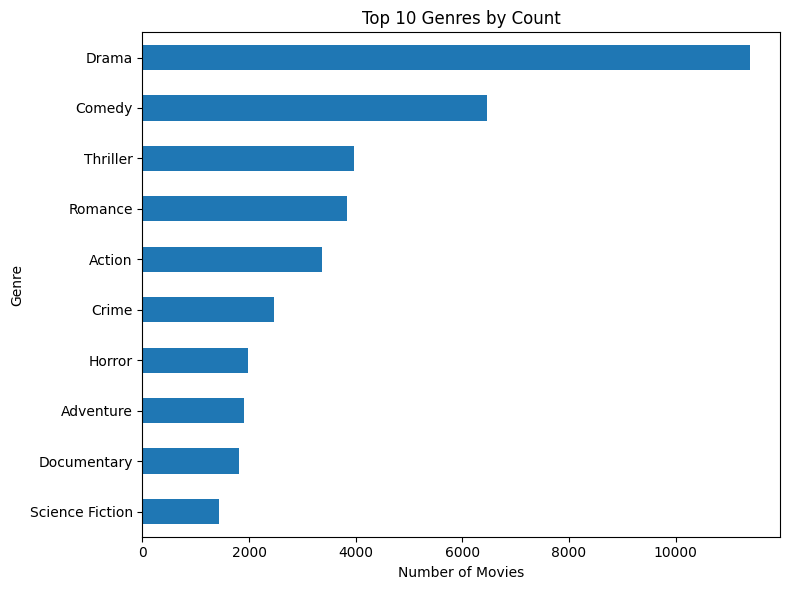

In [10]:
import matplotlib.pyplot as plt

genre_counts.head(10).plot(kind='barh', title='Top 10 Genres by Count', figsize=(8, 6))
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [11]:
users = pd.DataFrame(list(client["user_database"]["user_info"].find({}, {"_id": 0, "user_id": 1, "gender": 1})))
ratings = pd.DataFrame(list(client["movie_database"]["user_rate_data"].find({}, {"_id": 0, "user_id": 1})))

users["user_id"] = users["user_id"].astype(str)
ratings["user_id"] = ratings["user_id"].astype(str)

# Merge ratings with gender
merged = ratings.merge(users, on="user_id", how="left")

# Count by gender
gender_counts = merged["gender"].value_counts()
print("\nRatings by gender:")
print(gender_counts)

total = gender_counts.sum()
female_ratio = gender_counts.get("F", 0) / total
print(f"\nFemale rating ratio: {female_ratio:.2%}")



Ratings by gender:
gender
M    11427
F     2346
Name: count, dtype: int64

Female rating ratio: 17.03%


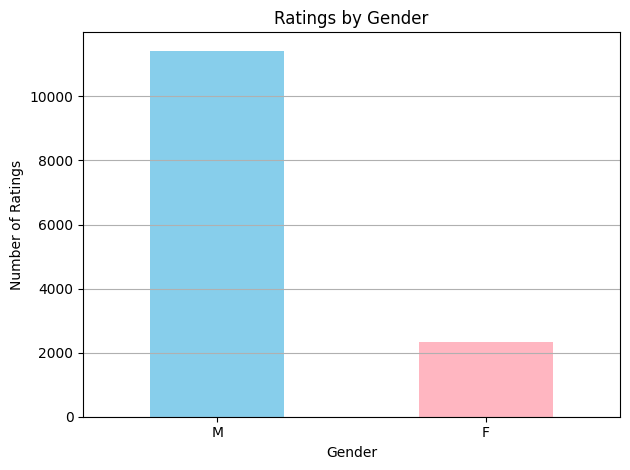

In [12]:
import matplotlib.pyplot as plt

# Bar plot
gender_counts.plot(kind='bar', color=['skyblue', 'lightpink'])
plt.title('Ratings by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
